# Differentially rotating a map

- https://docs.sunpy.org/en/stable/generated/gallery/differential_rotation/reprojected_map.html

How to apply differential rotation to a Map.

The example uses the `sunpy.coordinates.propagate_with_solar_surface`
context manager to apply differential rotation during coordinate
transformations.

In [ ]:
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS

import sunpy.map
from sunpy.coordinates import Helioprojective, propagate_with_solar_surface
from sunpy.data.sample import AIA_171_IMAGE

First, load an AIA observation.

In [ ]:
aiamap = sunpy.map.Map(AIA_171_IMAGE)
in_time = aiamap.date

Let's define the output frame to be five days in the future for an observer
at Earth (i.e., about five degrees offset in heliographic longitude compared
to the location of AIA in the original observation).

In [ ]:
out_time = in_time + 5*u.day
out_frame = Helioprojective(observer='earth', obstime=out_time,
                            rsun=aiamap.coordinate_frame.rsun)

Construct a WCS object for the output map.  If one has an actual ``Map``
object at the desired output time (e.g., the actual AIA observation at the
output time), one can use the WCS object from that ``Map`` object (e.g.,
``mymap.wcs``) instead of constructing a custom WCS.

In [ ]:
aiamap.scale

SpatialPair(axis1=<Quantity 2.402792 arcsec / pix>, axis2=<Quantity 2.402792 arcsec / pix>)

In [ ]:
out_center = SkyCoord(0*u.arcsec, 0*u.arcsec, frame=out_frame)
header = sunpy.map.make_fitswcs_header(aiamap.data.shape,
                                       out_center,
                                       scale=u.Quantity(aiamap.scale))
out_wcs = WCS(header)

Reproject the map from the input frame to the output frame.  We use the `sunpy.coordinates.propagate_with_solar_surface` context manager so
that coordinates are treated as points that evolve in time with the
rotation of the solar surface rather than as inertial points in space.

In [ ]:
with propagate_with_solar_surface():
    out_warp = aiamap.reproject_to(out_wcs)

Let's plot the differentially rotated Map next to the original Map.

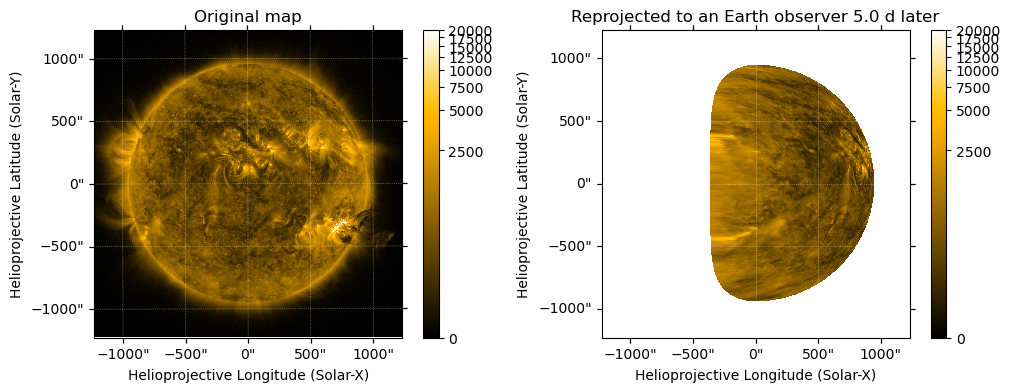

In [ ]:
fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(121, projection=aiamap)
aiamap.plot(axes=ax1, vmin=0, vmax=20000, title='Original map')
plt.colorbar()

ax2 = fig.add_subplot(122, projection=out_warp)
out_warp.plot(axes=ax2, vmin=0, vmax=20000,
              title=f"Reprojected to an Earth observer {(out_time - in_time).to('day')} later")
plt.colorbar()

plt.show()